# Arbitrary Value Imputation

This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

<AxesSubplot:>

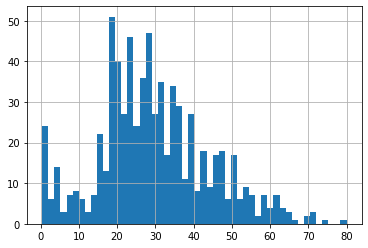

In [3]:
df['Age'].hist(bins=50)

# Advantages

Easy to implement

Captures the importance of missingess if there is one

# Disadvantages

Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use

# How To Handle Categroical Missing Values
# Frequent Category Imputation

In [10]:
df=pd.read_csv('train_HP.csv')

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df=pd.read_csv('train_HP.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [14]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [17]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [20]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the frequency with every feature

<AxesSubplot:>

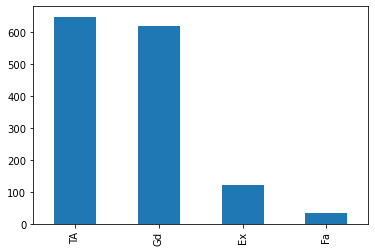

In [21]:
df['BsmtQual'].value_counts().plot.bar()

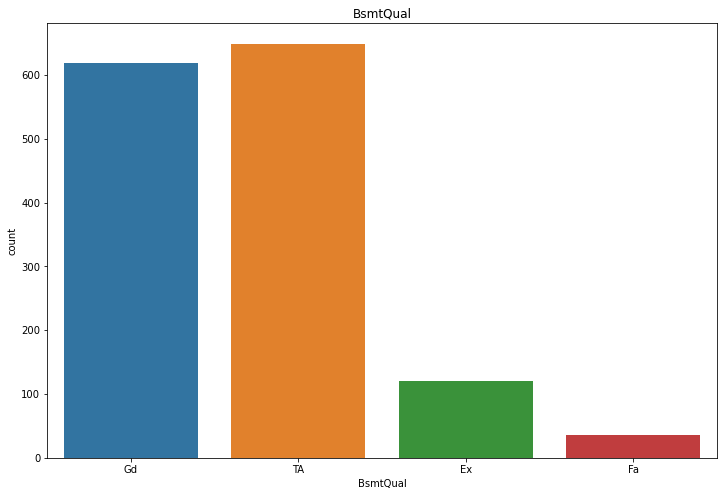

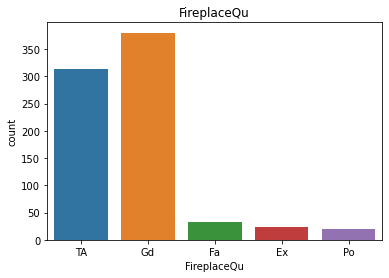

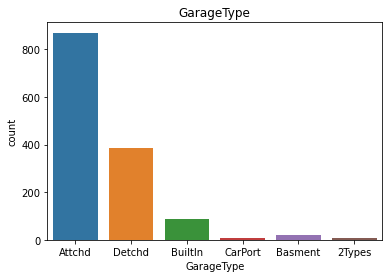

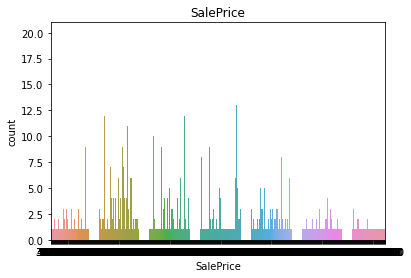

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
features = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']

plt.figure(figsize=(12, 8))

for feature in features:
    sns.countplot(data=df, x=feature)
    plt.title(feature)
    plt.show()

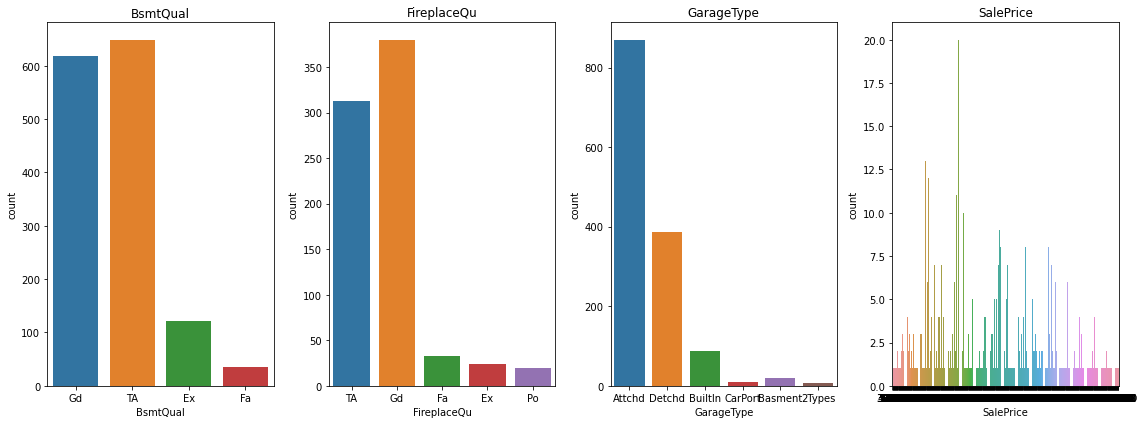

In [26]:
plt.figure(figsize=(16, 6))

for i, feature in enumerate(features, 0):
    plt.subplot(1, len(features), i+1)
    sns.countplot(data=df, x=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [29]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
df.groupby(['BsmtQual'])

In [33]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

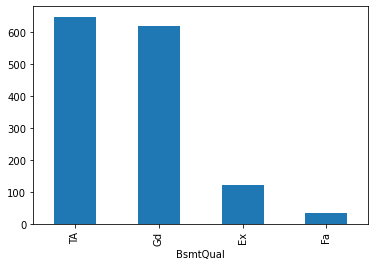

In [34]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [35]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [36]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [37]:
df['SalePrice'].value_counts()

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64

In [40]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [46]:
df['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [47]:
df['BsmtQual'].mode()[0]

'TA'

In [48]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [49]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [54]:
import pandas as pd

# Assuming df is your DataFrame
for column in df.columns[:-1]:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print()

Value counts for column 'BsmtQual':
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Value counts for column 'FireplaceQu':
Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Value counts for column 'GarageType':
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64



In [55]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Advantages

Easy To implement

Fater way to implement

# Disadvantages

Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

It distorts the relation of the most frequent label

# Adding a variable to capture NAN

In [87]:
df2=pd.read_csv('train_HP.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [88]:
import numpy as np
def impute_nan(df2,variable):
    df2[variable+'_Nan']= np.where(df2[variable].isnull(),1,0)

In [89]:
for column in df.columns[:-1]:
    impute_nan(df2,column)

In [90]:
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Nan,FireplaceQu_Nan,GarageType_Nan
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [91]:
df['BsmtQual'].mode()[0]

'TA'

In [92]:
frq=df['BsmtQual'].mode()[0]

In [95]:
df2.isnull().sum()

BsmtQual            37
FireplaceQu        690
GarageType          81
SalePrice            0
BsmtQual_Nan         0
FireplaceQu_Nan      0
GarageType_Nan       0
dtype: int64

In [96]:

def impute_nan(df2,variable):
    df2[variable].fillna(df2[variable].mode()[0],inplace=True) 

In [97]:
for column in df2.columns[:-4]:
    impute_nan(df2,column)

In [98]:
df2.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Nan,FireplaceQu_Nan,GarageType_Nan
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [99]:
df2.isnull().sum()

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
BsmtQual_Nan       0
FireplaceQu_Nan    0
GarageType_Nan     0
dtype: int64

# Suppose if you have more frequent categories, we just replace NAN with a new category

In [110]:
df3=pd.read_csv('train_HP.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df3.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [111]:
df3.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [112]:
def impute_nan(df,variable):
    df3[variable+"_newvar"]=np.where(df3[variable].isnull(),"Missing",df3[variable])


In [113]:
for column in df3.columns[:-1]:
    impute_nan(df3,column)
# for feature in ['BsmtQual','FireplaceQu','GarageType']:
#     impute_nan(df,feature)

In [114]:
df3.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [115]:
df3=df3.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df3.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
